Original size (in terms of pixels): 240000
Compressed size using 5 features: 5005 (CR: 47.95, Reduction: 97.91%)
Compressed size using 10 features: 10010 (CR: 23.98, Reduction: 95.83%)
Compressed size using 50 features: 50050 (CR: 4.80, Reduction: 79.15%)
Compressed size using 100 features: 100100 (CR: 2.40, Reduction: 58.29%)


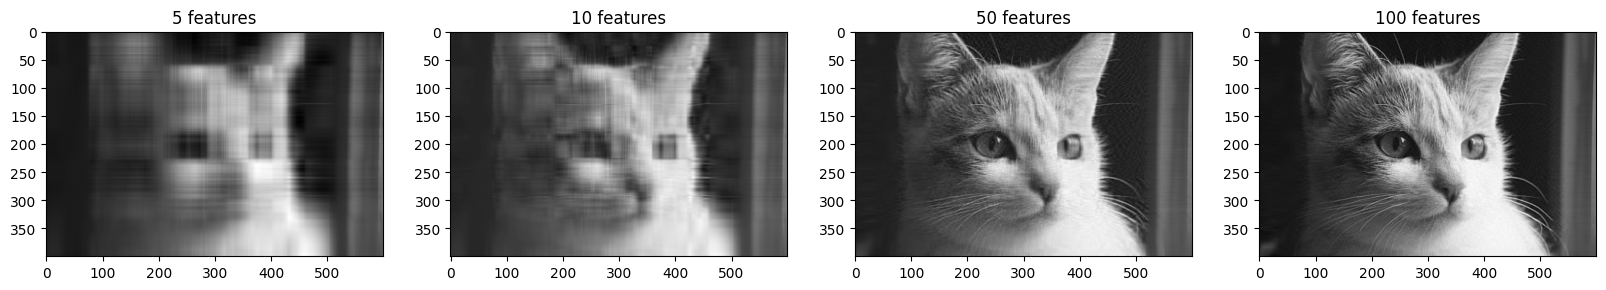

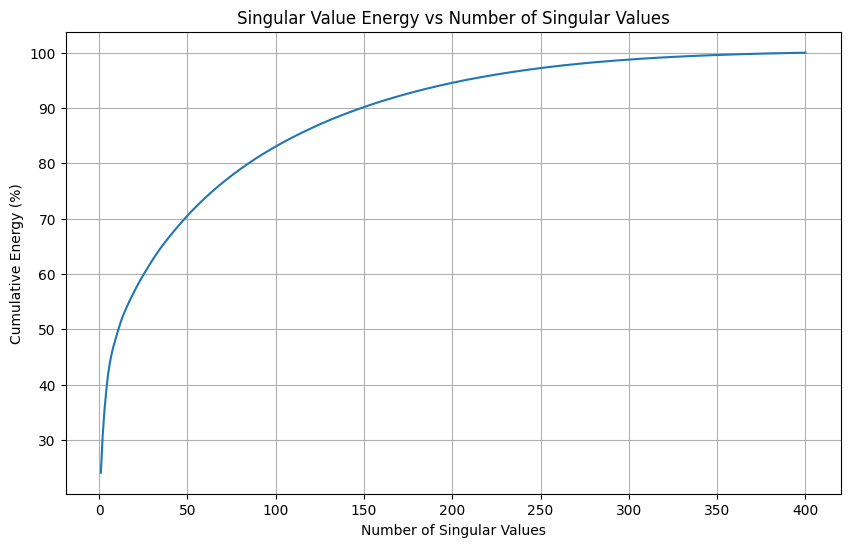

In [8]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt

# Function to load and convert an image to grayscale
def load_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert image to grayscale
    img_grayscale = np.array(img)  # Convert to NumPy array
    return img_grayscale


# Function to apply SVD and compress the image
def compress_image_svd(img_grayscale, p):
    U, sigma, V = np.linalg.svd(img_grayscale, full_matrices=False)
    img_compressed = np.dot(U[:, :p], np.dot(np.diag(sigma[:p]), V[:p, :]))
    return img_compressed, U, sigma, V


# Function to calculate the size of the compressed image in terms of vectors
def calculate_svd_size(U, sigma, V, p):
    size_U = U[:, :p].size  # Size of U matrix
    size_sigma = sigma[:p].size  # Size of sigma (singular values)
    size_V = V[:p, :].size  # Size of V matrix
    return size_U + size_sigma + size_V


# Load the image
image_path = 'C:/coding_bootcamp/Intensive_bootcamp/ds_intensive_course/W1_D3/W1_D3/W1_D3_notebooks/grayscale_cat.jpg'  # Specify the path to your JPEG image
img_grayscale = load_image(image_path)

# Get the original size of the image
original_size = img_grayscale.size  # The number of pixels in the original image

# List of p-values to try for compression
p_values = [5, 10, 50, 100]

# Dictionary to store compressed sizes
compressed_sizes = {}

plt.figure(figsize=(20, 10))
# Loop over p-values and compress the image
for i, p in enumerate(p_values, 1):
    # Compress the image using SVD
    img_compressed, U, sigma, V = compress_image_svd(img_grayscale, p)

    # Calculate the size of the SVD compressed representation
    compressed_size = calculate_svd_size(U, sigma, V, p)

    # Store the compressed size
    compressed_sizes[p] = compressed_size

    plt.subplot(1, len(p_values), i)
    plt.imshow(img_compressed, cmap='gray')
    plt.title(f"{p} features")

# Print comparison of original and compressed sizes
print(f"Original size (in terms of pixels): {original_size}")
for p, compressed_size in compressed_sizes.items():
    reduction = 100 * (1 - (compressed_size / original_size))

    # Calculate compression ratio
    compression_ratio = original_size / compressed_size

    print(f"Compressed size using {p} features: {compressed_size} (CR: {compression_ratio:.2f}, Reduction: {reduction:.2f}%)")

plt.show()
# Example output:
# Original size (in terms of pixels): 262144
# Compressed size using 5 features: 5250 (Reduction: 98.00%)
# Compressed size using 10 features: 10300 (Reduction: 96.07%)
# Compressed size using 50 features: 50500 (Reduction: 80.73%)
# Compressed size using 100 features: 100250 (Reduction: 61.74%)


# Perform SVD
U, sigma, V = np.linalg.svd(img_grayscale, full_matrices=False)

# Calculate the cumulative energy from singular values

# Total sum of singular values
total_energy = np.sum(sigma)

# Cumulative energy (information captured as we add singular values)
cumulative_energy = np.cumsum(sigma) / total_energy

# Plot the cumulative energy vs number of singular values
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(sigma) + 1), cumulative_energy * 100)
plt.title('Singular Value Energy vs Number of Singular Values')
plt.xlabel('Number of Singular Values')
plt.ylabel('Cumulative Energy (%)')
plt.grid(True)
plt.show()